<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_2_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE R-PACKAGE `TGCD` BY PENG ET AL. (2016)

In this website use the R-package `tgcd` developed by Peng et al. (2016).
This package consists of a function called `tgcd`, which is used
for deconvolving thermoluminescence glow curves by using either the
Lambert W-function, or by using the empirical general order kinetics
equation, as discussed in a later code \cite{Kitisetal_1998}. 


The package uses the Levenberg-Marquardt algorithm , but also allows
for constraining and fixing the parameters in the model. Specifically
the Levenberg-Marquardt algorithm was modified (\cite{Peng2016}),
so that the user can enter numerical constraints in the parameters,
and also can use fixed values for some of the parameters.

It is assumed that the background counts have been subtracted
from the experimental data before using the \emph{tgcd} code. The
code consists of a call to the function tgcd, in the general form:

$\textbf{tgcd}$ `(Sigdata, npeak, model = "lw", subBG = FALSE, pickp
="d2",pickb ="d0", nstart = 60, kkf = 0.03, mdt = NULL, mwt
= NULL, mr = NULL, edit.inis = TRUE, inisPAR = NULL, inisBG = NULL,
hr = NULL, hwd = NULL, pod = NULL, plot = TRUE, outfile = NULL)`

Some of the commonly used arguments in this function are: 

${\textbf{Sigdata}}$ matrix (required): a 2-column matrix, temperature
values and thermoluminescence signal values are stored in the first
and second column, respectively

${\textbf{npeak}}$ integer (required): number of glow peaks, the
allowed maximum number of glow peaks is set equal to 13

${\textbf{model}}$ character (with default): model used for glow
curve deconvolution, `"f1"`,`"f2"`, and `"f3"` for first-order models,
`"s1","s2"` for second-order models,`"g1","g2","g3"` for general-order
models, `"lw"` for the Lambert W (Wright Omega) function,`"m1","m2"`,
and `"m3"` for the mixed-order models.

${\textbf{inisPAR}}$ = `NULL, "d0" and "d01"` prompt the user
to click with a mouse on the original and log-scale glow curves respectively
to locate each glow peak,`"d1","d2","d3"`, and `"d4"` prompt the
user to click with a mouse on the first-, second- , third-, and fourth-derivative
of the glow curve respectively to locate each glow peak

${\textbf{edit.inis}}$ logical (with default): whether the user want
to further modify, constrain, or fix the initialized kinetic (and/or
background) parameters through an automatically generated Dialog Table

${\textbf{inisPAR}}$ matrix (optional): a matrix (3 or 4 columns)
used for storing initial kinetic parameters $I_{m},E,T_{m},b$ (or
$R,a$).

The goodness of fit of the equation to the data is expressed by the
Figure of Merit (FOM) which is defined as follows (Balian1977): 

\begin{equation}
FOM=\frac{\sum_{i=1}^{n}\mid y_{i}^{expt}-y_{i}^{fit}\mid}{\sum_{i=1}^{n}\mid y_{i}^{expt}\mid},\qquad i=1\ldots n\
\end{equation}

where $y_{i}^{expt}$ and $y_{i}^{fit}$ are the i-th experimental
point and the fitted value respectively, and n is the number of data
points. 

Note that the `tgcd` package is not available in Google Colab, and must be installed with the `install.packages()` function. Typically it may take ~15 seconds to load this library.

In [2]:
# install R package tgcd by Peng et al.
install.packages('tgcd')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# R-CODE 2.11 FITTING SINGLE PEAK TL DATA WITH THE KV-TL EQUATION

The first example below deconvolutes Reference glow curve #1, from
the project GLOCANIN which was an interlaboratory comparison of different
TL deconvolution methods {Bos1993d}. 

In this example the deconvolution method uses the transformed KV-TL equation which is based on the Lambert W-function:


\begin{equation}
I(T)=I_{m}\:\exp\left[-\frac{E}{k\,}\left(\frac{1}{T}-\frac{1}{T_{m}}\right)\right]\,\frac{W[e^{z_{m}}]+W[e^{z_{m}}]^{2}}{W[e^{z}]+W[e^{z}]^{2}}\
\end{equation}

\begin{equation}
z=\frac{R}{1-R}-\ln\left[\frac{1-R}{R}\right]+\frac{k\:T^{2}\:\exp\left[E/\left(kT_{m}\right)\right]}{kT_{m}^{2}(1-1.05\:R^{1.26})}\exp\left[-\frac{E}{k\,T}\right]\;\left(1-\frac{2kT}{E}\right)\
\end{equation}

\begin{equation}
z_{m}=\frac{R}{1-R}-\ln\left[\frac{1-R}{R}\right]+\frac{1-2kT_{m}/E}{1-1.05\:R^{1.26}}\
\end{equation}

where $I_{m}$ is the maximum TL intensity, $T_{m}$ is the correspoding temperature of  maximum TL intensity, $E$ is the activation energy (in eV),  $T$ is the temperature (in K), $\beta$ is the heating rate (in K/s), k$_{B}$ is the Boltzmann constant (in eV.K$^{-1}$) and ${R<1}$, $c>0$.

 The KV-TL equation  was discussed in the Python codes. The best fit parameters are $E$=1.812 eV,  $T_m$=490 K and retrapping ratio $R$=2e-14.

Both the very low value of $R$, and the value of the geometrical shape factor $\mu$=0.43 indicate first order kinetics.

[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),rValue(r)
1th-Peak,10968.38,1.182266,490.4689,2.73815e-14



Geometrical shape factor= 0.431
Figure Of Merit FOM= 0.0097

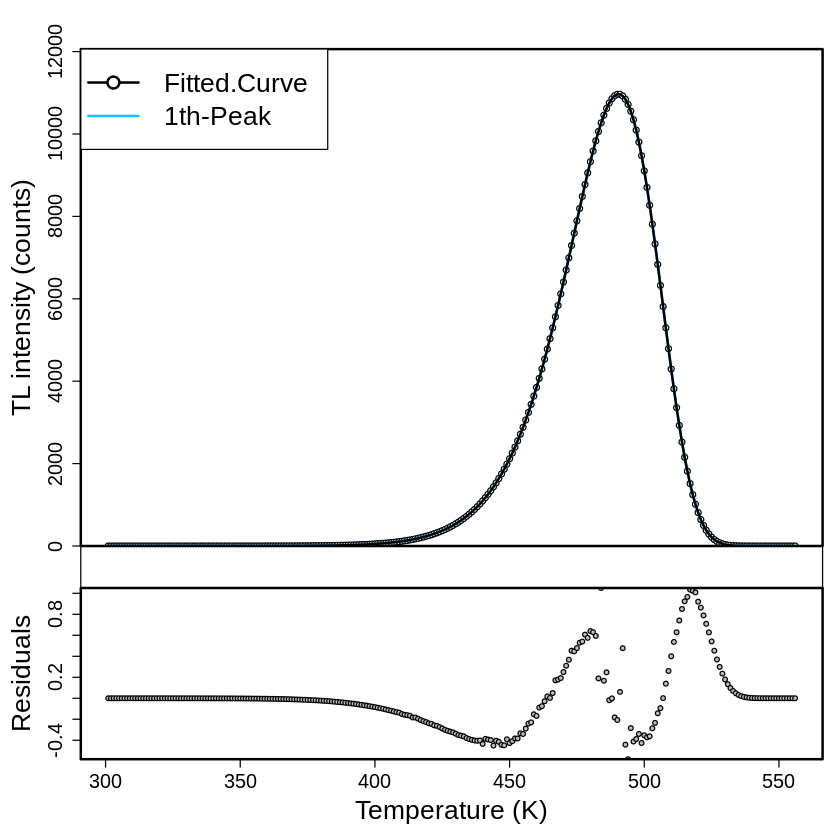

In [10]:
# Deconvolution of Reference glow curve #1 (project GLOCANIN) 
# Single TL peak analysis using the transformed KV-TL equation
 
library("tgcd")
data(Refglow)	# Load the data


startingPars <-
  cbind(c(15.0),c(1.0),c(520), c(0.1))   # Im, E, Tm, R

invisible(capture.output(TL1 <- tgcd(Refglow$x001, npeak=1, 
   model="lw",inisPAR=startingPars,nstart=10,edit.inis=FALSE)))
print.noquote("Best fit parameters")
TL1$pars
cat("\nGeometrical shape factor=",
    round(TL1$sp[,7],3))
cat("\nFigure Of Merit FOM=",round(TL1$FOM,4))

# R-CODE 2.14 FITTING SINGLE PEAK TL DATA USING MIXED ORDER KINETICS (MKO-TL)
This example shows how analyze the same simulated data as in the previous example,  using the mixed order kinetics TL equations (MOK-TL) in the `tgcd` package.

The MOK-TL equation is:

% Preview source code from paragraph 145 to 149

In summary, the following are the transformed MOK-TL equations for
CGCD analysis, in terms of the MOK kinetic parameter $\alpha$ and
the activation energy $E$:

\begin{equation}
I(T)=I_{m}\,\exp\left[\frac{E\,(T-T_{m})}{k\,T\,T_{m}}\right]\,\frac{(F(T_{m})-\alpha)^{2}}{F(T_{m})}\,\frac{F(T)}{(F(T)-\alpha)^{2}}\
\end{equation}

\begin{equation}
F(T)=\exp\left\{ \frac{1}{f_{MOK}}\,\frac{T^{2}}{T_{m}^{2}}\,\exp\left[\frac{E\,(T-T_{m})}{k\,T\,T_{m}}\right]\left(1-\frac{2\,k\,T}{E}\right)\right\} \
\end{equation}

\begin{equation}
f_{MOK}=\frac{2.6-0.9203\,\alpha+0.324\,\alpha^{3.388}}{2.6-2.9203\,\alpha+0.324\,\alpha^{3.338}}\
\end{equation}

The fitting parameters here are $\alpha$, $E$ and the parameters
$I_{m}$, $T_{m}$ can be estimated from the experimental data. 

In this example the best fit values are $E$=1.183 eV, $T_m$=490 K and the best fit MOK parameter is $\alpha$=0.00048.

The very low value of $_alpha$  indicates again that the TL peak follows first order kinetics.

[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),aValue(a)
1th-Peak,10967.94,1.182692,490.341,0.0004867257


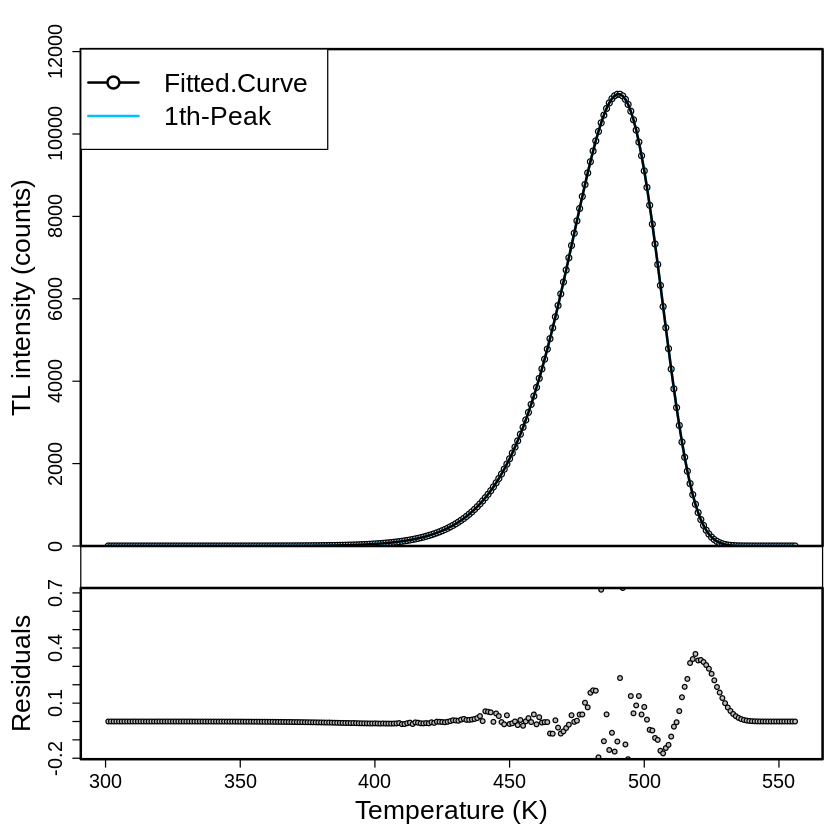

In [15]:
# Deconvolution of Reference GLOCANIN glow curve #1 with 
# the transformed MOK-TL equation
rm(list=ls())
library("tgcd")

# Load the data.
# the data file Refglow is the Reference GLOCANIN glow curve #1
data(Refglow)

# starting parameters Im, E, Tm, alpha
startingPars <-
  cbind(c(15.0),  c(1.0), c(520), c(0.1)) # Im, E, Tm, alpha

# call tgcd function
invisible(capture.output(TL1 <- tgcd(Refglow$x001, npeak=1, 
   model="m1",inisPAR=startingPars, nstart=10, edit.inis=FALSE)))

# printe parameters
print.noquote("Best fit parameters")
TL1$pars


# R-CODE 2.11 FITTING 2-PEAK TL DATA FOR LBO WITH TRANSFORMED KV-TL EQUATION
In the following example, the package `tgcd` is used to fit a
TL glow curve with two peaks, by using the KV-TL equation described above, which is based on the Lambert W-function.

The experimental data is from sample LiB$_4$O$_7$:Cu,In (LBO).

The code reads the `lbodata.txt` file from GitHub. 

The file contains pairs of (T,TL), and
the user provides initial estimates of the maximum TL intensity $I_{m}$,
of the activation energy $E$, of the temperature of maximum TL intensity
$T_{m}$, and of the recombination ratio $R$. 

[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),rValue(r)
1th-Peak,117.33,1.22,464.18,0.02
2th-Peak,23.05,1.12,519.50,0.00



Geometrical shape factors  

1th-Peak 2th-Peak 
    0.45     0.45

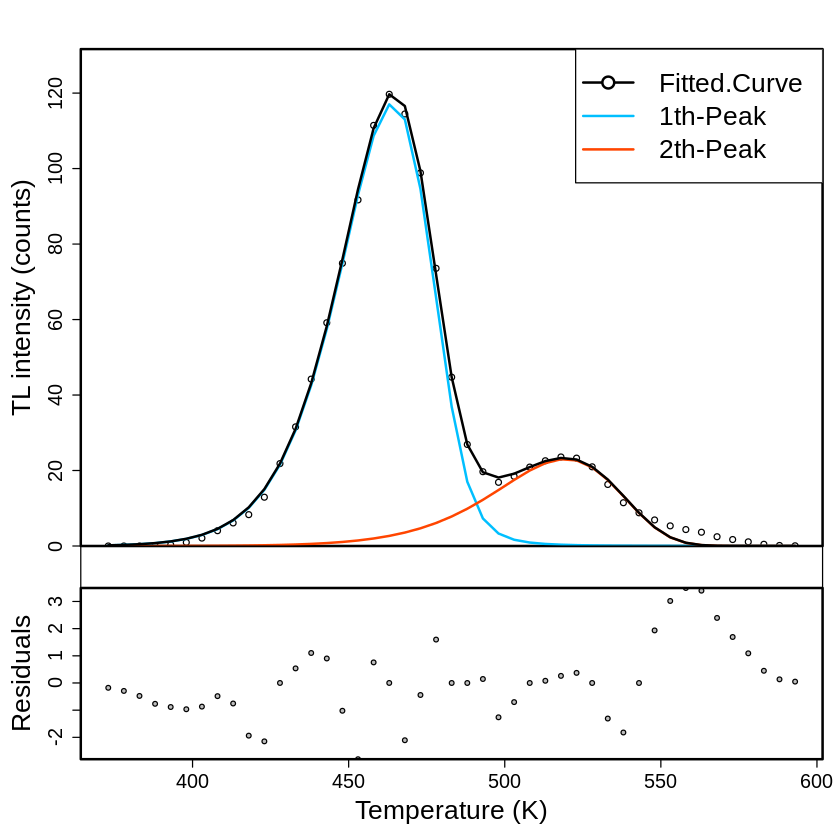

In [4]:
# Deconvolve data with 2 peaks using the LAMBERT W function

library("tgcd")

# Load the data
filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/lbodata.txt"
mydata <-read.table(url(filename))

# starting parameters Im, E, Tm, R
startingPars <-
  cbind(c(105.0,5.0),c(1.1,1.4),c(460,550),c(0.01,.01)) #Im,E,Tm,R

# call function tgcd
invisible(capture.output(TL1 <- tgcd(mydata, npeak=2, 
        model="lw",inisPAR=startingPars, nstart=10, edit.inis=FALSE)))
        
print.noquote("Best fit parameters")
round(TL1$pars,2)

cat("\nGeometrical shape factors"," ")
round(TL1$sp[,7],2)

# CODE 2.13 ANALYSIS OF 9-PEAK TL DATA FOR TLD-700 USING GENERAL ORDER KINETICS (GOK-TL)

In this example we use the transformed GOK-TL equation for analysis of a 9-peak TL signals:

\begin{equation}
I(T)=I_{m}b^{\frac{b}{b-1}}e^{u}\left[Z_{m}+\left(b-1\right)\left(1-\frac{2kT}{E}\right)\left(\frac{T^{2}}{T_{m}^{2}}e^{u}\right)\right]^{-\frac{b}{b-1}}\
\end{equation}

\begin{equation}
u=\frac{E}{kT}\:\frac{T-T_{m}}{T_{m}}
\end{equation}

\begin{equation}
Z_{m}=1+(b-1)\frac{2kT_{m}}{E}
\end{equation}


The fitting parameters in this expression are $b$ and $E$, while
the parameters $T_{m}$, $I_{m}$ can be estimated from the experimental
data. In this expression $b$ is the kinetic order of the TL process,
$I_{m}$=maximum intensity of the glow peak (in counts per K, or some
a.u.), $T_{m}$=temperature at peak maximum (in K). 

For this example    we use the transformed GOK-TL equation to fit a 9-peak LiF glow curve from the GLOCANIN project (Bos et al. [#Bos1993d, #Bos1994]).


[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),bValue(b)
1th-Peak,9819.60,1.24,387.32,1.02
2th-Peak,21049.82,1.36,428.23,1.16
3th-Peak,27490.96,2.11,462.31,1.94
4th-Peak,51652.37,2.55,488.18,1.14
5th-Peak,7244.93,1.33,495.30,1.00
6th-Peak,5180.40,1.47,523.36,1.35
7th-Peak,7238.70,2.07,557.10,1.26
8th-Peak,1649.56,3.18,585.60,1.04
9th-Peak,2323.92,2.25,602.55,2.00


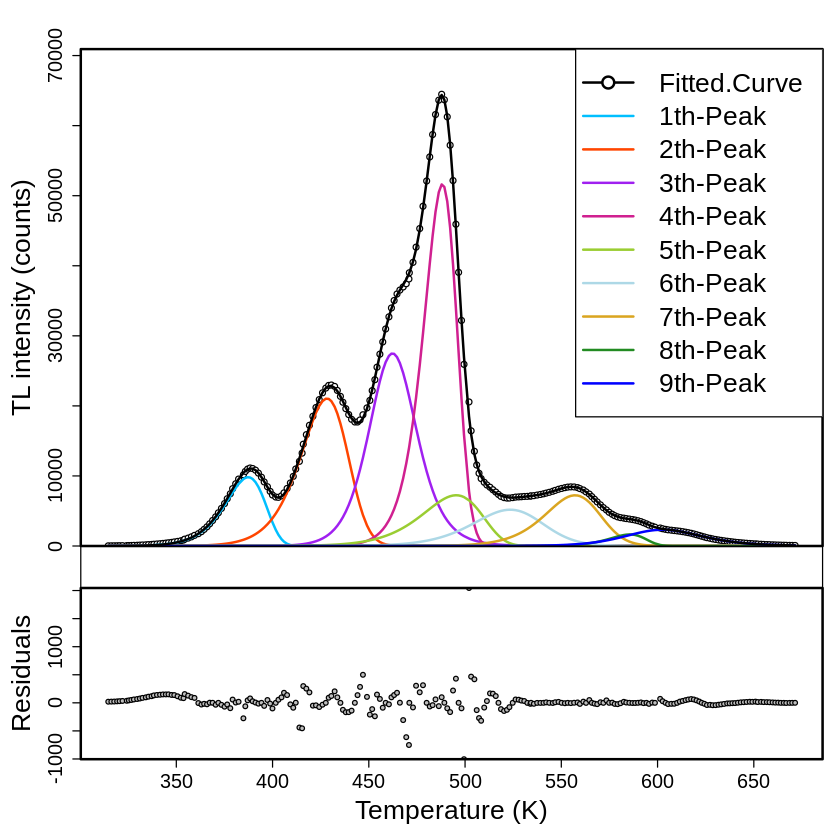

In [12]:
# Deconvolve TL signal using 9 peaks (no background subtraction)
# a GOK model using user-supplied initial kinetic parameters.
rm(list=ls())
library("tgcd")

# load data
data(Refglow)

# initial values of the parameters for 9 peaks: Im, E, Tm, b
knPars <-
  cbind(c(9824,21009,27792,50520,7153, 5496,6080,1641,2316), # Im
        c(1.24, 1.36, 2.10, 2.65, 1.43, 1.16, 2.48, 2.98, 2.25), # E
        c(387, 428, 462, 488, 493, 528, 559, 585, 602), # Tm
        c(1.02, 1.15, 1.99, 1.20, 1.28, 1.19, 1.40, 1.01, 1.18)) # b

# call function tgcd
invisible(capture.output(TL1 <- tgcd(Refglow$x009, npeak=9,
     model="g1",inisPAR=knPars, nstart=10, edit.inis=FALSE)))

# print best fit parameters for the 9 peaks
print.noquote("Best fit parameters")
round(TL1$pars,2)

# CODE 6.10 FITTING TL DATA FROM FELDSPARS USING THE KP-TL EQUATION


For freshly irradiated feldspar samples, the TL signals are analyzed using
the following KP equation for the intensity of a TL signal (see Eqs.29-30
in Kitis and Pagonis {Kitis_2013b}:

\begin{equation}
I_{\textrm{TL}}(t)=\frac{I_{0}\,F(t)^{2}\,e^{-\rho'(F(t))^{3}}\left(E^{2}-6k_{B}^{2}T^{2}\right)}{Ek_{B}sT^{2}z-2k_{B}^{2}sT^{3}z+\exp\left(E/k_{B}T\right)E\beta}+bgd\
\end{equation}

\begin{equation}
F_{\textrm{TL}}(t)=\ln\biggl(1+\frac{z\,sk_{B}T^{2}}{\beta E}\,e^{-\frac{E}{k_{B}\,T}}\left(1-\frac{2k_{B}T}{E}\right)\biggr)
\end{equation}

The fitting parameters are the scaling constant $I_{0}$,
thermal activation energy $E$ (eV), effective frequency factor $s$
(s$^{-1})$ for the TL process, dimensionless acceptor density $\rho'$
and a constant background $bgd$ (if necessary). Here $\beta$ is
the heating rate, in the following code we use $\beta$ =1 K/s. 

Even
though the KP-TL equation looks complex, it is rather easy and straightforward
to code it.

In order to obtain reliable results with the KP-TL equation, one must
constraint the code using experimental data, because there are infinite
combinations of the parameters $E,s,\rho'$ which will fit the data.

It is best to use the known value of $E$, which can be obtained from
separate initial rise and $T_{\textrm{max}}-T_{\textrm{stop}}$ experiments.
In the following code we use $E=1.45$ eV, a value obtained from a
separate analysis using the initial rise method, and the least squares
fitting parameters are $I_{0}$, $s$, $\rho'$. 

The experimental data are from a feldspar sample KST4 which was irradiated and heated up to 300$^o$C, to thermally remove the lower temperature peaks in the TL glow curve, before measuring the TL signal..

Notice that the KP-TL equation does not describe the TL glow curve very well at
low temperatures. This is due to the approximations made during derivation
of the KP-TL equation.

For more details on the experimental data see Pagonis et al. {Pagonis2019a}, and Polymeris et al. {Polymeris_2017}. It is also important to remember that the
physical meaning of the parameter $s$ in the KP-TL equation is an
effective frequency factor for the TL process (equal to $s=s_{th}\:s_{tun}/B$
), and not the frequency factor $s_{th}$ for the thermal activation
process.



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Best fit parameters  
Imax= 1.40e+13  s= 3.50e+12  (s^-1) 
rho= 0.0096 E= 1.45  eV

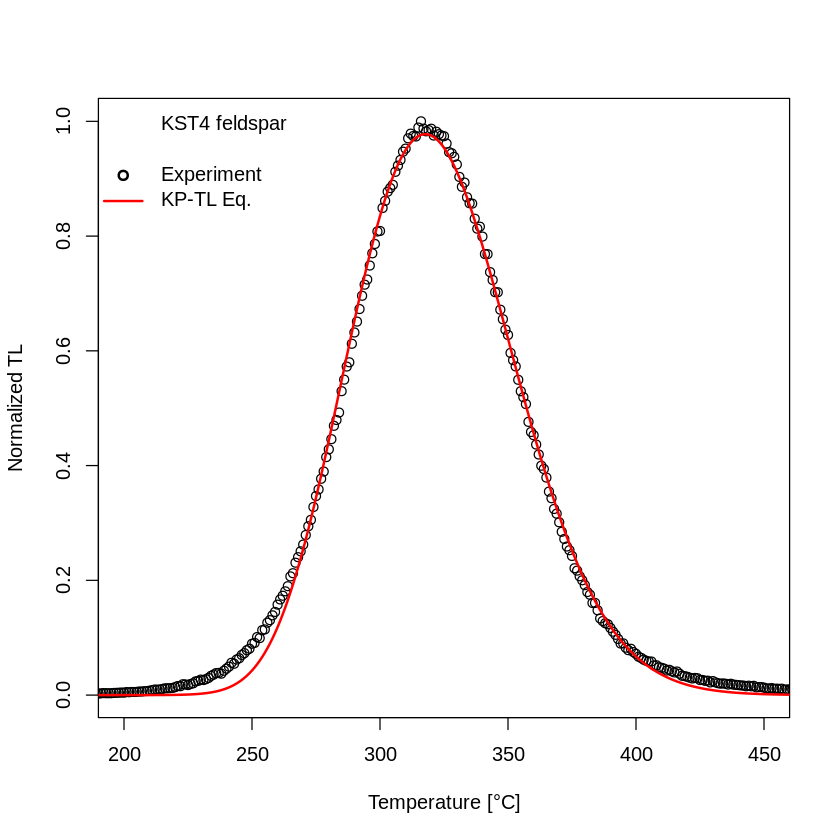

In [19]:
## Least squares fit to TL using the KP-TL eqt (TLT model)-
  
rm(list = ls(all=T))
options(warn=-1)
# install R packages for fitting data
install.packages('minpack.lm')
install.packages('expint')

library("minpack.lm")
library(expint)

# Load the data
filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/ph300s0.asc"
mydata <-read.table(url(filename))

t<-as.numeric(gsub(",", ".", gsub("\\.", "", mydata[,1])))
y<-as.numeric(gsub(",", ".", gsub("\\.", "", mydata[,3])))

# normalize the data
y<-y/max(y)

# plot the data
mydata<-data.frame(t,y)
plot(t,y,xlab="Temperature [\u00B0C]",ylab="Normalized TL",
col="black",pch=1,xlim=c(200,450))

# Boltzmann constant
kB<-8.617e-5
z<-1.8
fit_data <-mydata

# Thermal activation energy (eV)
En<-1.45
T<-t+273

# find best fit to fit_data using starting values
# Imax=1e12, s=1e11, rho=.009

fit <- minpack.lm::nlsLM(
 formula=y~imax* exp(-rho*( (log(1+z*s*kB*((T**2.0)/
abs(En))*exp(-En/(kB*T))*(1-2*kB*T/En)))**3.0))*
(En**2.0-6*(kB**2.0)*(T**2.0))*( (log(1+z*s*kB*((T**2.0)/
abs(En))*exp(-En/(kB*T))*(1-2*kB*T/En)))**2.0)/
(En*kB*s*(T**2)*z-2*(kB**2.0)*s*z*(T**3.0)+exp(En/(kB*T))*En),
  data = fit_data,
start = list(imax=1e12,s=1e11,rho=.009),upper=c(1e20,1e13,.02),
 lower=c(1e11,1e11,.008))

# Obtain parameters from best fit
imax_fit <- coef(fit)[1]
s_fit <- coef(fit)[2]
rho_fit <- coef(fit)[3]
En_fit <- En

## plot analytical solution
lines(
x = t,imax_fit* exp(-rho_fit*( (log(1+z*s_fit*kB*((T**2.0)/
abs(En_fit))*exp(-En_fit/(kB*T))*(1-2*kB*T/En_fit)))**3.0))*
(En_fit**2.0-6*(kB**2.0)*(T**2.0))*((log(1+z*s_fit*kB*((T**2.0)/
abs(En_fit))*exp(-En_fit/(kB*T))*(1-2*kB*T/En_fit)))**2.0)/
(En_fit*kB*s_fit*(T**2)*z-2*(kB**2.0)*s_fit*z*(T**3.0)+
exp(En_fit/(kB*T))*En_fit),col="red",lwd=2)
legend("topleft",bty="n", pch=c(NA,NA,1,NA),lwd=2,
lty=c(NA,NA,NA,"solid"),
c(expression('KST4 feldspar',' ',
'Experiment','KP-TL Eq.')),col=c(NA,NA,"black","red"))

## print results
cat("\nBest fit parameters"," ")
cat("\nImax=", formatC(imax_fit, format = "e", digits = 2),
" s=",formatC(s_fit, format = "e", digits = 2)," (s^-1) ")
cat("\nrho=",round(rho_fit,digits=4),sep=" ","E=",En_fit," eV")